In [1]:
#import pip
#pip.main(['install','tensorflow-gpu'])
#pip.main(['install','keras'])
#pip.main(['install','h5py'])

In [2]:
import numpy as np
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
import keras
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import sys
import os

import matplotlib.pyplot as plt
import matplotlib as mpl


def escape():
    sys.exit()


C:\Anaconda3\envs\Tensorflow-GPU-Keras\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import_directory = "C:\\Users\\Tamim Mirza\\PycharmProjects\\Project\\Database2\\"
counter = 0
data_array = np.empty((0, 2))
files = os.listdir(import_directory)
for file in files:
    print('Opening File : ', file)
    data_set = np.load(import_directory+file)
    data_array = np.vstack((data_array, data_set))

#separated = np.array([x for x in data_array if x[1] == 0])

Opening File :  destinationPayload_TestbedMonJun14Flows.xml.npy
Opening File :  destinationPayload_TestbedSatJun12Flows.xml.npy
Opening File :  destinationPayload_TestbedSunJun13Flows.xml.npy
Opening File :  destinationPayload_TestbedThuJun17-2Flows.xml.npy
Opening File :  destinationPayload_TestbedThuJun17-3Flows.xml.npy
Opening File :  destinationPayload_TestbedTueJun15-1Flows.xml.npy
Opening File :  destinationPayload_TestbedTueJun15-2Flows.xml.npy
Opening File :  destinationPayload_TestbedTueJun15-3Flows.xml.npy
Opening File :  destinationPayload_TestbedWedJun16-1Flows.xml.npy
Opening File :  destinationPayload_TestbedWedJun16-2Flows.xml.npy
Opening File :  destinationPayload_TestbedWedJun16-3Flows.xml.npy


In [4]:
#np.random.shuffle(separated)
np.random.shuffle(data_array)
print("ok")

ok


In [5]:
img_row = 50
img_col = 50

N = np.shape(data_array)[0]
train_test_split_percentage = 0.75

X_train = data_array[:int(N * train_test_split_percentage), 0]
X_test = data_array[int(N * train_test_split_percentage):, 0]

X_train = np.array([x.reshape(img_row, img_col, 3) for x in X_train])
X_test = np.array([x.reshape(img_row, img_col, 3) for x in X_test])

In [6]:
y_train = data_array[:int(N * train_test_split_percentage), 1]
y_test = data_array[int(N * train_test_split_percentage):, 1]

y_train = np.array([[x] for x in y_train])
y_test = np.array([[x] for x in y_test])

In [40]:
model_vgg19_conv = VGG19(include_top=False, weights='imagenet', input_shape=(img_col, img_row, 3))

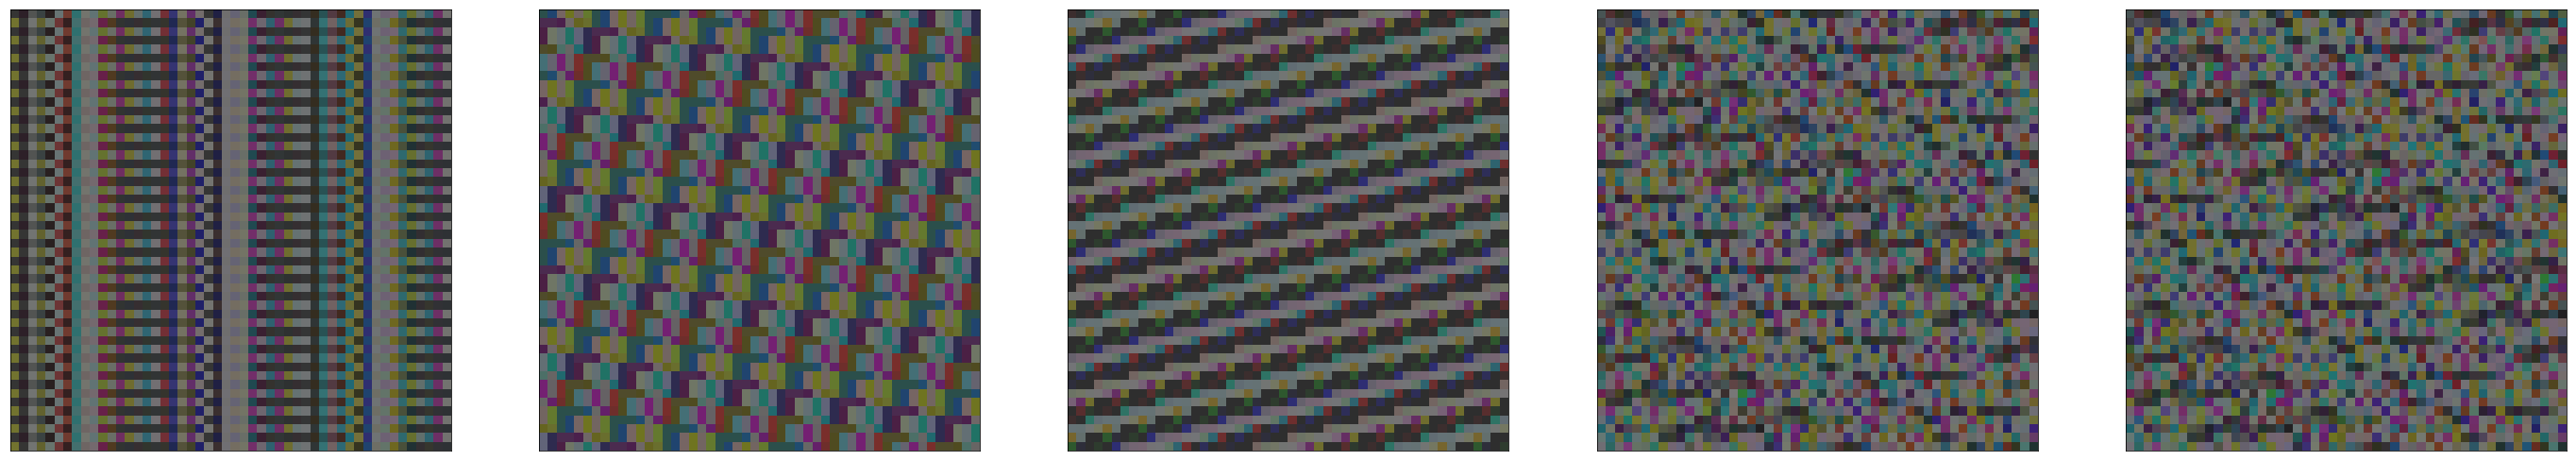

In [38]:
#ploting images for data
%matplotlib inline
n = 40  # how many digits we will display
plt.figure(figsize=(400, 150))
for i in range(6,11):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [41]:
for layer in model_vgg19_conv.layers:
    layer.trainable = False
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [42]:
x = model_vgg19_conv.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid', name='predictions')(x)

my_model = Model(input=model_vgg19_conv.input, output=x)
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

C:\Anaconda3\envs\Tensorflow-GPU-Keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  


In [45]:
my_model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

batch_size = 32
epochs = 2

In [46]:
hist = my_model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)
score = my_model.evaluate(X_test, y_test, verbose=0)

Train on 481676 samples, validate on 120420 samples
Epoch 1/2
481676/481676 [==============================] - 804s 2ms/step - loss: 0.0454 - acc: 0.9900 - val_loss: 0.0420 - val_acc: 0.9908
Epoch 2/2
481676/481676 [==============================] - 805s 2ms/step - loss: 0.0424 - acc: 0.9908 - val_loss: 0.0431 - val_acc: 0.9908


In [47]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.04166916962365522
Test accuracy: 0.9907274077100534


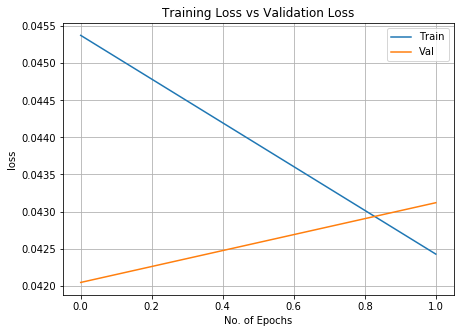

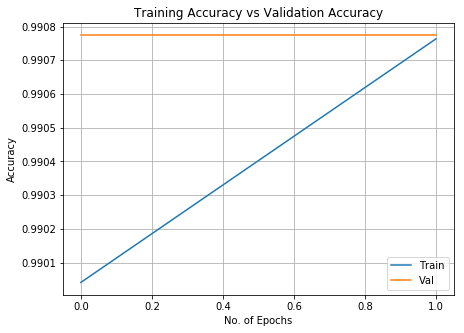

In [48]:
training_loss= hist.history['loss']
val_loss= hist.history['val_loss'] 
training_acc= hist.history['acc'] 
val_acc= hist.history['val_acc']
xc=range(epochs)

plt.figure(1,figsize=(7,5)) 
plt.plot(xc,training_loss)
plt.plot(xc,val_loss) 
plt.xlabel('No. of Epochs') 
plt.ylabel('loss') 
plt.title('Training Loss vs Validation Loss') 
plt.grid(True) 
plt.legend(['Train','Val'])

plt.figure(2,figsize=(7,5)) 
plt.plot(xc,training_acc) 
plt.plot(xc,val_acc) 
plt.xlabel('No. of Epochs') 
plt.ylabel('Accuracy') 
plt.title('Training Accuracy vs Validation Accuracy') 
plt.grid(True) 
plt.legend(['Train','Val'],loc=4)

total length =  200699
Anomolies =  9433
Normal =  191266


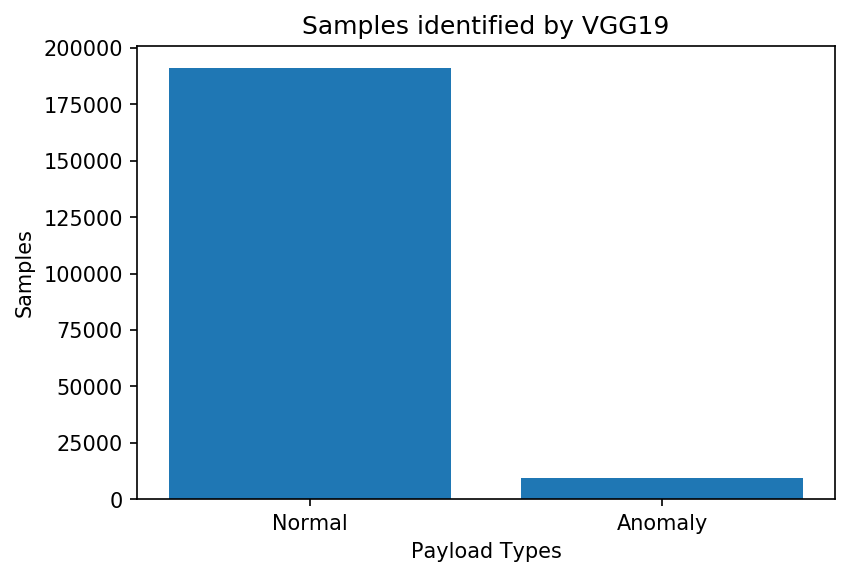

In [49]:
checking_occurences = [x for x in y_test if x == 1]
print("total length = ",len(y_test))
print("Anomolies = ",len(checking_occurences))
print("Normal = ", (len(y_test) - len(checking_occurences)))

n = len(y_test) - len(checking_occurences)
a = len(checking_occurences)

label = ['Normal', 'Anomaly']
samples = [n, a]

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi * 1.5

# this is for plotting purpose
index = np.arange(len(label))
plt.bar(index, samples)
plt.xlabel('Payload Types', fontsize=10)
plt.ylabel('Samples', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=0)
plt.title('Samples identified by VGG19')
plt.show()

In [50]:
predictions = my_model.predict(X_test)
print("Predictions = ",predictions)

Predictions =  [[0.0000000e+00]
 [3.0254741e-36]
 [1.3322988e-25]
 ...
 [0.0000000e+00]
 [0.0000000e+00]
 [3.3234162e-21]]


In [51]:
rounded = [[round(x[0])] for x in predictions]
from sklearn.metrics import f1_score
result = f1_score(y_test,rounded, average=None, labels = [0,1])
print("F1 = ",result)

F1 =  [0.99511683 0.9082935 ]


In [52]:
result = f1_score(y_test,rounded, average='macro')
print("F1 macro = ",result)

F1 macro =  0.9517051657706019


In [53]:
result = f1_score(y_test,rounded, average='micro')
print("F1 Micro= ",result)

F1 Micro=  0.9907274077100534


In [54]:
result = f1_score(y_test,rounded, average='weighted')
print("F1 Weighted= ",result)

F1 Weighted=  0.9910360711649695


In [55]:
import sklearn.metrics
target_names = ['normal','anomaly']
print(sklearn.metrics.classification_report(y_test,rounded,labels = [0,1], target_names=target_names))

             precision    recall  f1-score   support

     normal       1.00      0.99      1.00    191266
    anomaly       0.85      0.98      0.91      9433

avg / total       0.99      0.99      0.99    200699



In [56]:
my_model.save("FYP_Finalhd5.hd5")
my_model.save("FYP_Finalh5.h5")

----- activations -----
(1, 50, 50, 3)
(1, 50, 50, 64)
(1, 50, 50, 64)
(1, 25, 25, 64)
(1, 25, 25, 128)
(1, 25, 25, 128)
(1, 12, 12, 128)
(1, 12, 12, 256)
(1, 12, 12, 256)
(1, 12, 12, 256)
(1, 12, 12, 256)
(1, 6, 6, 256)
(1, 6, 6, 512)
(1, 6, 6, 512)
(1, 6, 6, 512)
(1, 6, 6, 512)
(1, 3, 3, 512)
(1, 3, 3, 512)
(1, 3, 3, 512)
(1, 3, 3, 512)
(1, 3, 3, 512)
(1, 1, 1, 512)
(1, 512)
(1, 128)
(1, 1)
Displaying activation map 0


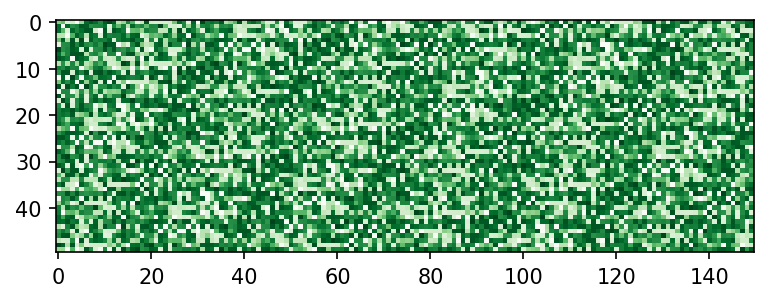

Displaying activation map 1


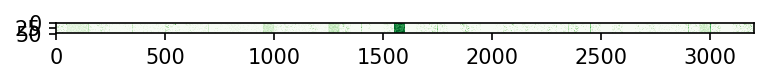

Displaying activation map 2


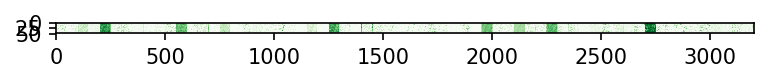

Displaying activation map 3


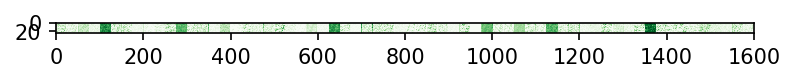

Displaying activation map 4


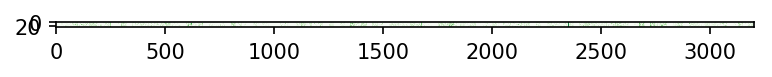

Displaying activation map 5


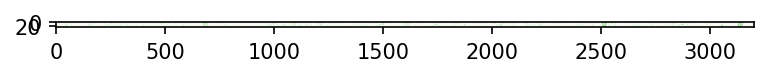

Displaying activation map 6


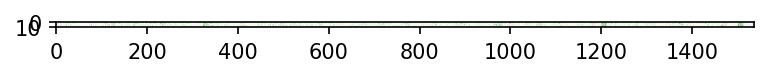

Displaying activation map 7


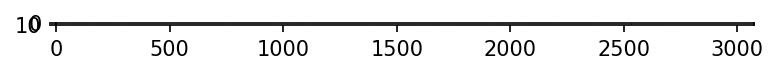

Displaying activation map 8


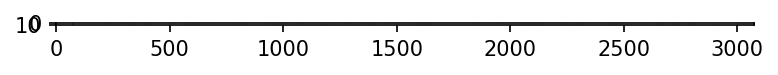

Displaying activation map 9


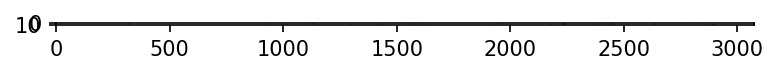

Displaying activation map 10


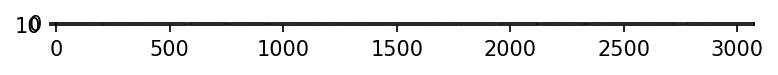

Displaying activation map 11


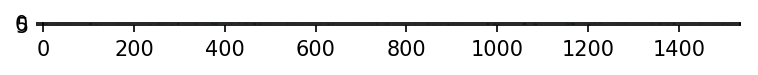

Displaying activation map 12


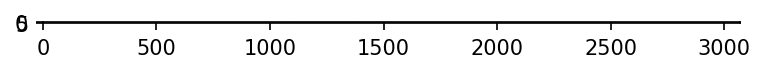

Displaying activation map 13


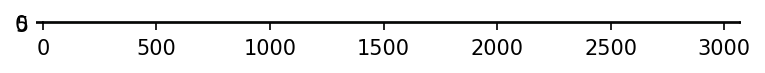

Displaying activation map 14


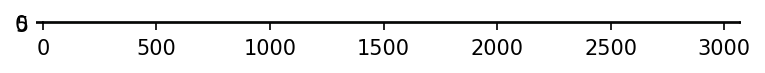

Displaying activation map 15


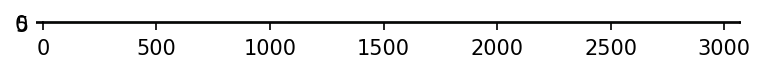

Displaying activation map 16


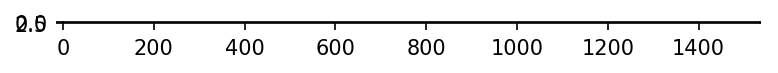

Displaying activation map 17


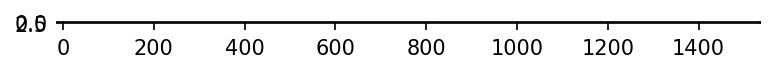

Displaying activation map 18


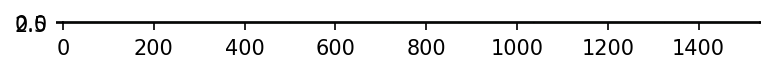

Displaying activation map 19


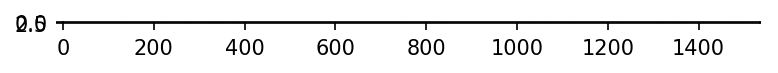

Displaying activation map 20


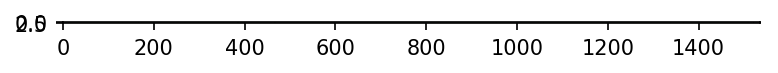

Displaying activation map 21


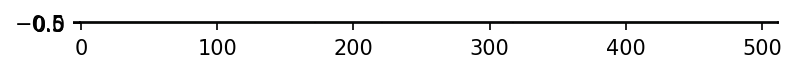

Displaying activation map 22


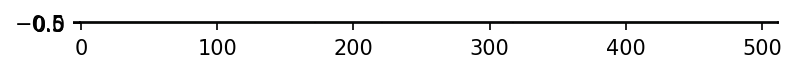

Displaying activation map 23


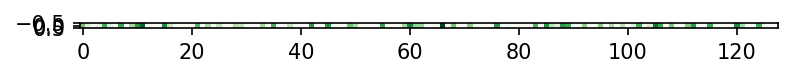

Displaying activation map 24


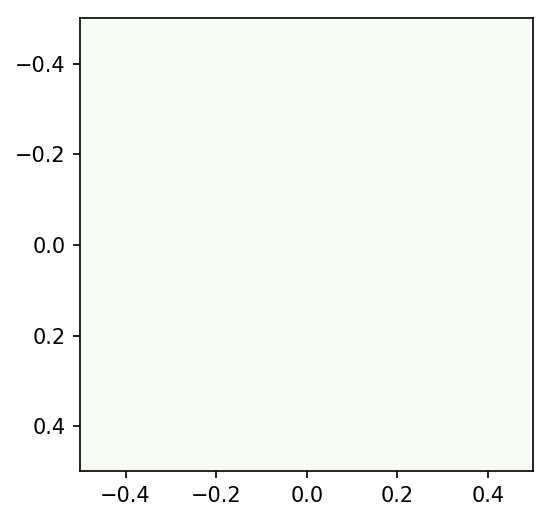

In [64]:
from read_activations import get_activations, display_activations
v_index= 4
x_valid = X_train[:5]
a = get_activations(my_model, x_valid[v_index:v_index+1], print_shape_only=True)
display_activations(a)